In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "../Dataset/visit-patterns-by-census-block-group/"
file = "cbg_patterns.csv"

In [3]:
df = pd.read_csv(path + file)
df.head()

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
0,1.005951e+10,1538352000,1541030400,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10..."
1,1.009051e+10,1538352000,1541030400,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...","{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12..."
2,1.047957e+10,1538352000,1541030400,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195..."
3,1.069040e+10,1538352000,1541030400,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17..."
4,1.073011e+10,1538352000,1541030400,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550..."


# 数据可视化和摘要

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220735 entries, 0 to 220734
Data columns (total 13 columns):
census_block_group          220734 non-null float64
date_range_start            220735 non-null int64
date_range_end              220735 non-null int64
raw_visit_count             220629 non-null float64
raw_visitor_count           220629 non-null float64
visitor_home_cbgs           220735 non-null object
visitor_work_cbgs           220735 non-null object
distance_from_home          220518 non-null float64
related_same_day_brand      220735 non-null object
related_same_month_brand    220735 non-null object
top_brands                  220735 non-null object
popularity_by_hour          220735 non-null object
popularity_by_day           220735 non-null object
dtypes: float64(4), int64(2), object(7)
memory usage: 21.9+ MB


## 数据摘要
### 标称属性
根据标称属性的定义，此数据集没有标称属性，但可以注意到：**related_same_day_brand**、**related_same_month_brand**和**top_brands**中，**brand**是可枚举的。基于此我们进行如下处理：  
#### related_same_day_brand

In [6]:
df1 = df.copy(deep=True)

In [7]:
brand = []
for i in df1['related_same_day_brand']:
    i = i.strip('[]')
    i = i.split(',')  # to list
    for j in i:
        brand.append(j.strip('""'))
brand_df = pd.DataFrame(brand,columns=['brand'])
brand_df['brand'].value_counts()

mcdonalds                                             46457
walmart                                               43342
                                                      35542
Dunkin' Donuts                                        20972
Dollar General                                        17784
                                                      ...  
BMC (Building Materials and Construction Services)        1
New Balance                                               1
Terry's Supermarket                                       1
Joe's Crab Shack                                          1
Blast Fitness                                             1
Name: brand, Length: 1935, dtype: int64

我们取频数前50进行频数可视化：

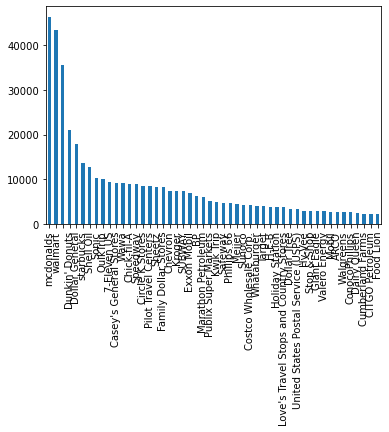

In [8]:
brand_df['brand'].value_counts().head(50).plot.bar()

#### related_same_month_brand

In [9]:
brand = []
for i in df1['related_same_month_brand']:
    i = i.strip('[]')
    i = i.split(',')  # to list
    for j in i:
        brand.append(j.strip('""'))
brand_df = pd.DataFrame(brand,columns=['brand'])
brand_df['brand'].value_counts()

mcdonalds                 206438
walmart                   164347
SUBWAY                    104876
starbucks                  89666
Shell Oil                  77980
                           ...  
Sentry Foods                   1
Delta Sonic                    1
Childcare Network              1
Los Altos Ranch Market         1
Halloween Express              1
Name: brand, Length: 1019, dtype: int64

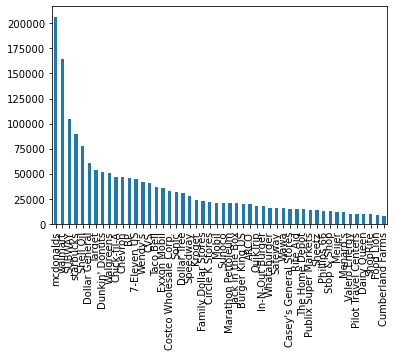

In [10]:
brand_df['brand'].value_counts().head(50).plot.bar()

#### top_brands

In [11]:
brand = []
for i in df1['top_brands']:
    if i == '[]':
        continue
    i = i.strip('[]')
    i = i.split(',')  # to list
    for j in i:
        brand.append(j.strip('""'))
brand_df = pd.DataFrame(brand,columns=['brand'])
brand_df['brand'].value_counts()

United States Postal Service (USPS)    22119
SUBWAY                                 16600
Dollar General                         13515
mcdonalds                              12670
Shell Oil                              10940
                                       ...  
Penske Automotive Group                    1
The Health Hut                             1
TRONY Italy                                1
Kid Care Pediatrics                        1
MoneyGram                                  1
Name: brand, Length: 3131, dtype: int64

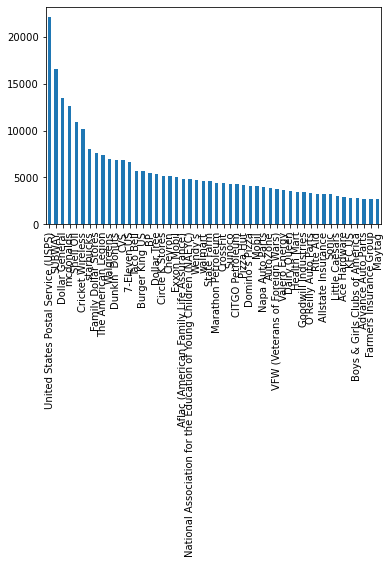

In [12]:
brand_df['brand'].value_counts().head(50).plot.bar()

### 数值属性
* 数值属性有：**raw_visit_count**、**raw_visitor_count**、**distance_from_home**

#### raw_visit_count
* 该属性缺失值个数为106
* 五数概括：

In [13]:
df['raw_visit_count'].describe()

count    2.206290e+05
mean     4.793066e+04
std      6.252655e+04
min      6.000000e+01
25%      1.704200e+04
50%      3.064000e+04
75%      5.667800e+04
max      7.179900e+06
Name: raw_visit_count, dtype: float64

#### raw_visitor_count
* 该属性缺失值个数为106
* 五数概括：

In [14]:
df['raw_visitor_count'].describe()

count    2.206290e+05
mean     1.182032e+04
std      3.045832e+04
min      5.000000e+01
25%      3.430000e+03
50%      6.541000e+03
75%      1.309900e+04
max      6.113949e+06
Name: raw_visitor_count, dtype: float64

#### distance_from_home
* 该属性缺失值个数为217
* 五数概括

In [15]:
df['distance_from_home'].describe()

count    2.205180e+05
mean     3.511280e+04
std      9.973193e+04
min      7.060000e+02
25%      8.584000e+03
50%      1.461400e+04
75%      3.139775e+04
max      6.297845e+06
Name: distance_from_home, dtype: float64

## 数据可视化

### 直方图
#### raw_visit_count
* 因为最大最小值差距较大，所以根据五数概括中的**Q3** = 56678，取小于60000的值进行可视化：

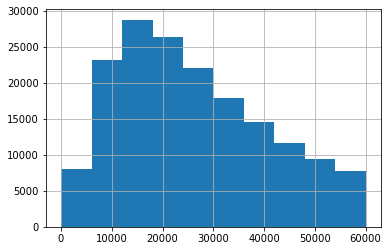

In [16]:
df[df['raw_visit_count']<60000]['raw_visit_count'].hist()

#### raw_visitor_count

* 因为最大最小值差距较大，所以根据五数概括中的**Q3** = 13099，取小于20000的值进行可视化：

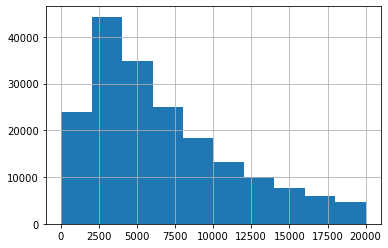

In [17]:
df[df['raw_visitor_count']<20000]['raw_visitor_count'].hist()

#### distance_from_home
* 因为最大最小值差距较大，所以根据五数概括中的**Q3** = 31397.75，取小于40000的值进行可视化：

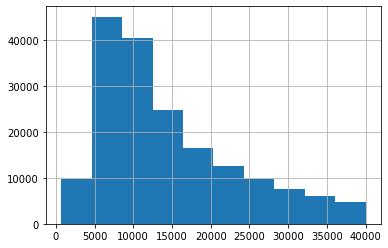

In [18]:
df[df['distance_from_home']<40000]['distance_from_home'].hist()

### 盒图
#### raw_visit_count

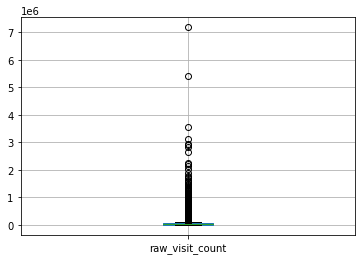

In [19]:
visit = pd.DataFrame(df.raw_visit_count)
visit.boxplot(sym = 'o')  # 中间箱体是否缺口) #也可用plot.box()
plt.show()

#### raw_visitor_count

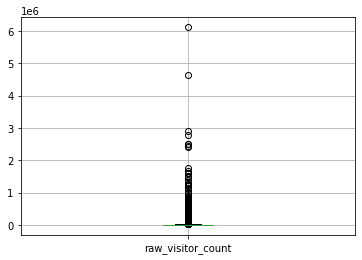

In [20]:
visitor = pd.DataFrame(df.raw_visitor_count)
visitor.boxplot(sym = 'o')  # 中间箱体是否缺口) #也可用plot.box()
plt.show()

#### distance_from_home

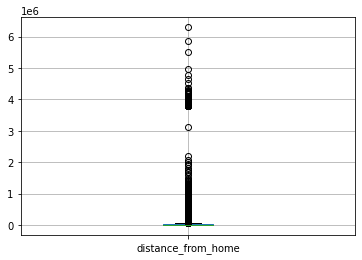

In [21]:
distance = pd.DataFrame(df.distance_from_home)
distance.boxplot(sym = 'o')  # 中间箱体是否缺口) #也可用plot.box()
plt.show()

# 数据缺失的处理
## 观察数据集中缺失数据，分析其缺失的原因。
* **distance_from_home**：访客到CBG的离家中位距离，以米为单位。缺失值个数为217。
* **raw_visit_count**和**raw_visitor_count**缺失值个数相同。
* **census_block_group**缺失1个值，有可能是异常缺失。

In [22]:
missing_data = df.isnull().sum().sort_values(ascending = False)
missing_data

distance_from_home          217
raw_visitor_count           106
raw_visit_count             106
census_block_group            1
popularity_by_day             0
popularity_by_hour            0
top_brands                    0
related_same_month_brand      0
related_same_day_brand        0
visitor_work_cbgs             0
visitor_home_cbgs             0
date_range_end                0
date_range_start              0
dtype: int64

## 将缺失部分剔除
剔除后，剩余220518条记录：

In [23]:
df1 = df.copy(deep=True)
df1 = df1.dropna()

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220518 entries, 0 to 220628
Data columns (total 13 columns):
census_block_group          220518 non-null float64
date_range_start            220518 non-null int64
date_range_end              220518 non-null int64
raw_visit_count             220518 non-null float64
raw_visitor_count           220518 non-null float64
visitor_home_cbgs           220518 non-null object
visitor_work_cbgs           220518 non-null object
distance_from_home          220518 non-null float64
related_same_day_brand      220518 non-null object
related_same_month_brand    220518 non-null object
top_brands                  220518 non-null object
popularity_by_hour          220518 non-null object
popularity_by_day           220518 non-null object
dtypes: float64(4), int64(2), object(7)
memory usage: 23.6+ MB


## 用最高频率值来填补缺失值

In [25]:
df1 = df.copy(deep=True)
# distance_from_home
most = df1['distance_from_home'].value_counts().index[0]
df1['distance_from_home'] = df1['distance_from_home'].fillna(most)
# raw_visitor_count
most = df1['raw_visitor_count'].value_counts().index[0]
df1['raw_visitor_count'] = df1['raw_visitor_count'].fillna(most)
# raw_visit_count
most = df1['raw_visit_count'].value_counts().index[0]
df1['raw_visit_count'] = df1['raw_visit_count'].fillna(most)
# census_block_group
most = df1['census_block_group'].value_counts().index[0]
df1['census_block_group'] = df1['census_block_group'].fillna(most)

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220735 entries, 0 to 220734
Data columns (total 13 columns):
census_block_group          220735 non-null float64
date_range_start            220735 non-null int64
date_range_end              220735 non-null int64
raw_visit_count             220735 non-null float64
raw_visitor_count           220735 non-null float64
visitor_home_cbgs           220735 non-null object
visitor_work_cbgs           220735 non-null object
distance_from_home          220735 non-null float64
related_same_day_brand      220735 non-null object
related_same_month_brand    220735 non-null object
top_brands                  220735 non-null object
popularity_by_hour          220735 non-null object
popularity_by_day           220735 non-null object
dtypes: float64(4), int64(2), object(7)
memory usage: 21.9+ MB


以**distance_from_home**为例，由于缺失值不多，所以可视化对比不是太明显：

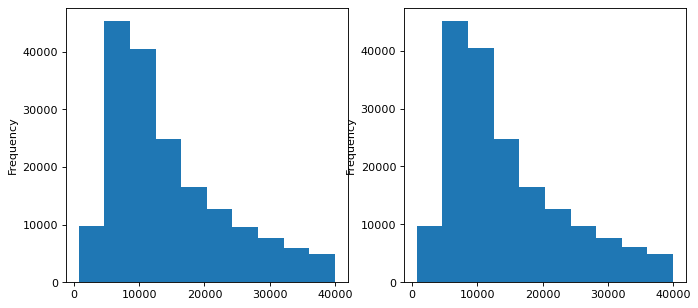

In [27]:
# df1[df1['distance_from_home']<40000]['distance_from_home'].hist()
plt.figure(figsize=(10,10), dpi=80)
plt.figure(1)
ax1 = plt.subplot(221)
df1[df1["distance_from_home"]<40000]['distance_from_home'].plot.hist()
ax2 = plt.subplot(222)
df[df["distance_from_home"]<40000]['distance_from_home'].plot.hist()

## 通过属性的相关关系来填补缺失值

In [28]:
df1 = df.copy(deep=True)

In [29]:
corr_matrix = df1.corr()
corr_matrix

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,distance_from_home
census_block_group,1.000000,NaN,NaN,-0.053986,-0.032591,-0.000658
date_range_start,NaN,NaN,NaN,NaN,NaN,NaN
date_range_end,NaN,NaN,NaN,NaN,NaN,NaN
raw_visit_count,-0.053986,NaN,NaN,1.000000,0.815850,0.021721
raw_visitor_count,-0.032591,NaN,NaN,0.815850,1.000000,0.032879
distance_from_home,-0.000658,NaN,NaN,0.021721,0.032879,1.000000


### raw_visit_count、raw_visitor_count
查看缺失值所对应的记录，发现**raw_visit_count**和**raw_visitor_count**同时缺失，且无法通过相关关系来填补：

In [30]:
df1[df1['raw_visitor_count'].isnull()]

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
220629,2.605399e+11,1538352000,1541030400,NaN,NaN,{},{},NaN,[],[],[],[],{}
220630,6.912099e+11,1538352000,1541030400,NaN,NaN,{},{},NaN,[],[],[],[],{}
220631,7.205799e+11,1538352000,1541030400,NaN,NaN,{},{},NaN,[],[],[],[],{}
220632,2.060000e+10,1538352000,1541030400,NaN,NaN,{},{},NaN,[],[],[],[],{}
220633,3.600394e+11,1538352000,1541030400,NaN,NaN,{},{},NaN,[],[],[],[],{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220730,4.805799e+11,1538352000,1541030400,NaN,NaN,{},{},NaN,[],[],[],[],{}
220731,3.611901e+11,1538352000,1541030400,NaN,NaN,{},{},NaN,[],[],[],[],{}
220732,2.603398e+11,1538352000,1541030400,NaN,NaN,{},{},NaN,[],[],[],[],{}
220733,1.500799e+11,1538352000,1541030400,NaN,NaN,{},{},NaN,[],[],[],[],{}


### distance_from_home
没有对应的相关关系能填补缺失值。

In [31]:
df1[df1['distance_from_home'].isnull()]

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
1939,2.290000e+10,1538352000,1541030400,221.0,120.0,{},{},NaN,"[""Wendy's"",""Walgreens"",""starbucks"",""mcdonalds""...","[""Fred Meyer Jewelers""]",[],"[64,65,62,62,62,65,64,67,68,68,72,65,83,69,55,...","{""Monday"":46,""Tuesday"":50,""Wednesday"":30,""Thur..."
2838,2.290000e+10,1538352000,1541030400,108.0,87.0,{},{},NaN,"[""The American Legion"",""SUBWAY"",""AC Value Cent...","[""United States Postal Service (USPS)""]","[""United States Postal Service (USPS)""]","[31,28,28,28,27,28,25,28,26,27,23,27,23,30,27,...","{""Monday"":18,""Tuesday"":16,""Wednesday"":12,""Thur..."
3128,6.601095e+11,1538352000,1541030400,545.0,121.0,{},{},NaN,"[""BevMo"",""SUBWAY""]","[""SUBWAY""]",[],"[60,57,58,57,54,53,52,67,57,55,52,60,74,81,72,...","{""Monday"":78,""Tuesday"":77,""Wednesday"":105,""Thu..."
3986,4.101199e+11,1538352000,1541030400,151.0,63.0,{},{},NaN,"[""Dairy Queen"",""Taco Bell"",""Charter Communicat...","[""Safeway"",""Fred Meyer"",""walmart"",""Fred Meyer ...",[],"[5,6,5,7,8,7,18,18,23,30,29,29,20,23,16,12,10,...","{""Monday"":29,""Tuesday"":9,""Wednesday"":27,""Thurs..."
4372,7.211307e+11,1538352000,1541030400,444.0,167.0,{},{},NaN,"[""Publix Super Markets""]",[],[],"[104,94,102,103,99,93,92,78,73,70,80,61,60,68,...","{""Monday"":68,""Tuesday"":65,""Wednesday"":62,""Thur..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220730,4.805799e+11,1538352000,1541030400,NaN,NaN,{},{},NaN,[],[],[],[],{}
220731,3.611901e+11,1538352000,1541030400,NaN,NaN,{},{},NaN,[],[],[],[],{}
220732,2.603398e+11,1538352000,1541030400,NaN,NaN,{},{},NaN,[],[],[],[],{}
220733,1.500799e+11,1538352000,1541030400,NaN,NaN,{},{},NaN,[],[],[],[],{}


则，选择用**中位数**填补缺失值：

In [32]:
df1.fillna(df1.median(),inplace=True)

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220735 entries, 0 to 220734
Data columns (total 13 columns):
census_block_group          220735 non-null float64
date_range_start            220735 non-null int64
date_range_end              220735 non-null int64
raw_visit_count             220735 non-null float64
raw_visitor_count           220735 non-null float64
visitor_home_cbgs           220735 non-null object
visitor_work_cbgs           220735 non-null object
distance_from_home          220735 non-null float64
related_same_day_brand      220735 non-null object
related_same_month_brand    220735 non-null object
top_brands                  220735 non-null object
popularity_by_hour          220735 non-null object
popularity_by_day           220735 non-null object
dtypes: float64(4), int64(2), object(7)
memory usage: 21.9+ MB


## 通过数据对象之间的相似性来填补缺失值
采用临近值填充：

In [34]:
df1 = df.copy(deep=True)

In [35]:
df1 = df1.fillna(method='ffill')

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220735 entries, 0 to 220734
Data columns (total 13 columns):
census_block_group          220735 non-null float64
date_range_start            220735 non-null int64
date_range_end              220735 non-null int64
raw_visit_count             220735 non-null float64
raw_visitor_count           220735 non-null float64
visitor_home_cbgs           220735 non-null object
visitor_work_cbgs           220735 non-null object
distance_from_home          220735 non-null float64
related_same_day_brand      220735 non-null object
related_same_month_brand    220735 non-null object
top_brands                  220735 non-null object
popularity_by_hour          220735 non-null object
popularity_by_day           220735 non-null object
dtypes: float64(4), int64(2), object(7)
memory usage: 21.9+ MB


### raw_visit_count

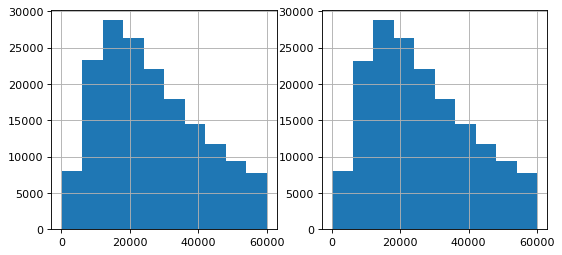

In [37]:
plt.figure(figsize=(8,8), dpi=80)
plt.figure(1)
ax1 = plt.subplot(221)
df1[df1['raw_visit_count']<60000]['raw_visit_count'].hist()
ax2 = plt.subplot(222)
df[df['raw_visit_count']<60000]['raw_visit_count'].hist()

### raw_visitor_count

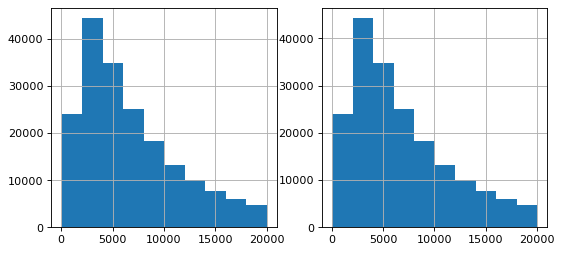

In [38]:
plt.figure(figsize=(8,8), dpi=80)
plt.figure(1)
ax1 = plt.subplot(221)
df1[df1['raw_visitor_count']<20000]['raw_visitor_count'].hist()
ax2 = plt.subplot(222)
df[df['raw_visitor_count']<20000]['raw_visitor_count'].hist()

### distence_from_home

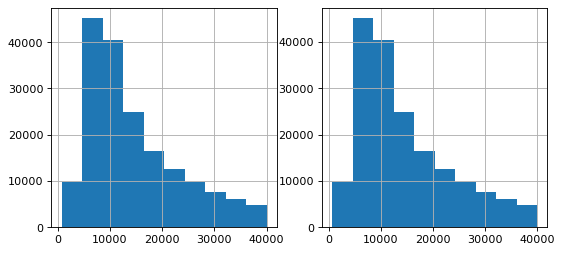

In [39]:
plt.figure(figsize=(8,8), dpi=80)
plt.figure(1)
ax1 = plt.subplot(221)
df1[df1['distance_from_home']<40000]['distance_from_home'].hist()
ax2 = plt.subplot(222)
df[df['distance_from_home']<40000]['distance_from_home'].hist()